In [1]:
from annainflux import client
import pandas as pd

In [2]:
rs = client.query("SHOW TAG VALUES FROM dependencies WITH KEY=project")
nodes = pd.DataFrame(rs.get_points())
nodes = nodes.drop(columns=['key'])
nodes = nodes.append({'value': 'qtbase'}, ignore_index=True)

projects = nodes['value'].tolist()


In [3]:
rs = client.query("SELECT * FROM dependencies")
links = pd.DataFrame(rs.get_points())
links = links.drop(columns=['branch', 'depHeadSha1', 'time'])
links = links.rename(columns={"project": "source", "dependency": "target", "howFar": "value"})


In [4]:
from bokeh.layouts import row
from bokeh.plotting import figure, show, output_file

colors = [
    "#0B486B", "#79BD9A", "#CFF09E",
    "#79BD9A", "#0B486B", "#79BD9A",
    "#CFF09E", "#79BD9A", "#0B486B",
    "#0B486B", "#79BD9A", "#CFF09E",
    "#79BD9A", "#0B486B", "#79BD9A",
    "#CFF09E", "#79BD9A", "#0B486B"
]

hm = figure(title="Categorical Heatmap", tools="hover", toolbar_location=None,
            x_range=projects, y_range=projects)

#hm.rect(x, y, color=colors, width=1, height=1)
hm.rect(projects, projects, color=colors, width=1, height=1)

output_file("categorical.html", title="categorical.py example")

show(row(hm,sizing_mode="scale_width"))  # open a browser

In [5]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt
df = DataFrame(abs(np.random.randn(18, 18)), index=projects, columns=projects)

plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
data = DataFrame(0, index=projects, columns=projects)
for i in range (links.shape[0]):        
    data[links.iloc[ i , : ]['source']    ][links.iloc[ i , : ]['target']] = links.iloc[ i , : ]['value']    

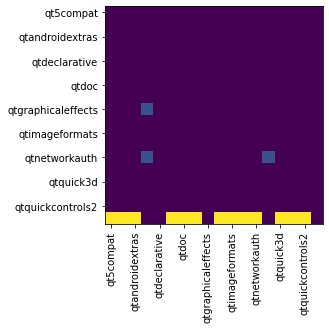

In [7]:
#Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
#Cols = ['A', 'B', 'C', 'D']
from matplotlib.pyplot import cm
#imshow(A, interpolation='nearest', cmap=cm.Blues)

#plt.figure(2)
plt.yticks(np.arange(0, len(data.index), 2), data.index)
plt.yticks(ha = 'right')
#plt.yticks(ha = 'left')
#plt.xaxis.set_label_position('top') 
plt.xticks(np.arange(0, len(data.columns), 2), data.columns)
#plt.xticks(rotation=90, va = 'top')
plt.xticks(rotation=90, va = 'top')
plt.imshow(data, interpolation='nearest')
#plt.grid(True)


#plt.pcolor(df3)
plt.show()

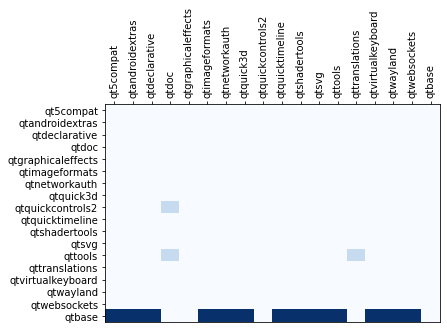

In [8]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

#ax.set_xticklabels(labels, rotation=45, ha='right')

ax.set_xticklabels(data.columns.tolist(),rotation=90, minor=False, )
ax.set_yticklabels(data.index.tolist(), minor=False)
plt.show()